In [0]:
import tensorflow
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Part 1 - Data Preprocessing
# Importing the dataset
from google.colab import files
uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [17]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [0]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [0]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [0]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [0]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential     #responsible for creating any kid of NN like ANN, CNN, RNN
from keras.layers import Dense          #for creating hidden layers
#from keras.layers import LeakyReLU,PReLU,ELU      #Diffrent types of activation functions
from keras.layers import Dropout        #A regularization parameter used for regularization of dataset

In [37]:
# Initialising the ANN
classifier = Sequential()

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))    #output_dim means the number of neurons in 1st hidden layer output dimention got updated as units
                                                                                                        #init means the weight initialization techniques that we are using but init is got updated as kernel_initializer
                                                                                                        #activation means the activatio function that we are using
                                                                                                        #input_dim means how many inupt features are connected to the hidden layer


In [0]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [0]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [44]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 247
Trainable params: 247
Non-trainable params: 0
________________________________________________________

In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])   #optimizer Adam is best for compiling
                                                                                               #Loss is binary_crossentropy beacause we are using categorical output as 0 and 1 if a regression problem we should use categorical_crossentropy


In [47]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)      #Advantages of using a batch size < number of all samples: It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. and uses less time and less space in Ram
                                                                                                           #nb_epoch is number of epoch its gonna tak while training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Train on 5359 samples, validate on 2641 samples
Epoch 1/100





5359/5359 [==============================] - 2s 313us/step - loss: 0.5302 - acc: 0.7792 - val_loss: 0.4857 - val_acc: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 159us/step - loss: 0.4688 - acc: 0.7988 - val_loss: 0.4567 - val_acc: 0.8042
Epoch 3/100
5359/5359 [==============================] - 1s 162us/step - loss: 0.4454 - acc: 0.8115 - val_loss: 0.4486 - val_acc: 0.8084
Epoch 4/100
5359/5359 [==============================] - 1s 163us/step - loss: 0.4315 - acc: 0.8140 - val_loss: 0.4324 - val_acc: 0.8073
Epoch 5/100
5359/5359 [==============================] - 1s 162us/step - loss: 0.4125 - acc: 0.8177 - val_loss: 0.4170 - val_acc: 0.8167
Epoch 6/100
5359/5359 [==============================] - 1s 164us/step - loss: 0.3956 - acc: 0.8304 - val_loss: 0.4092 - val_acc: 0.8277
Epoch 7/100
5359/5359 [==============================] - 1s 166us/step - loss: 0.3798 - acc: 0.8423 - val_loss: 0.3951 - v

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


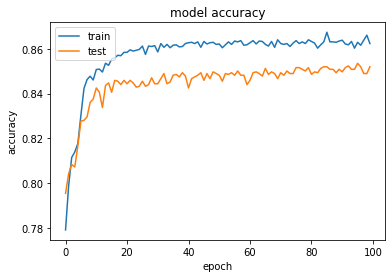

In [48]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

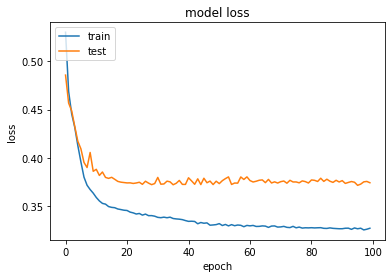

In [49]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1519,   76],
       [ 215,  190]])

In [53]:

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8545